In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# En 2D

In [3]:
# Origen
x0, z0 =10, 0
v=5                                        # Velocidad en km/s
de=0.1                                     # Espacio entre puntos
x=np.arange(0,20+de,de)                    # Dominio horizontal
z=np.arange(10,0-de,-de)                   # Dominio vertical 
[X, Z]=np.meshgrid(x,z)                    # Malla de puntos
t=np.sqrt((X-x0)**2+(Z-z0)**2)/v           # Tiempos de arribo a los puntos de la malla
T=np.reshape(t,(len(z),len(x)),'F')        # Variable para graficar

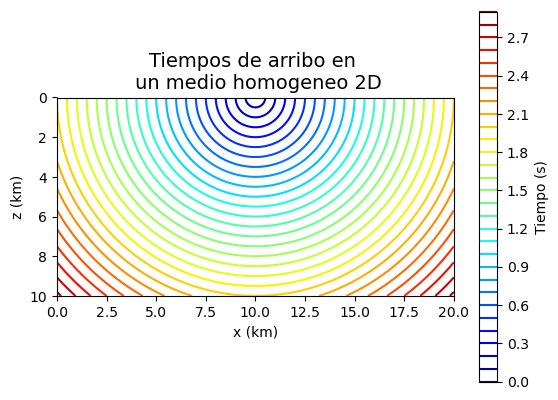

In [4]:
# Grafica con barra discreta
fig=plt.figure(1)
ax =fig.add_subplot(111)
plt.contour(X,Z,T,30) 
ax.set_title('Tiempos de arribo en \n un medio homogeneo 2D',fontsize=14)
ax.set_xlabel(r'x (km)', fontsize=10)
ax.set_ylabel(r'z (km)', fontsize=10)
ax.invert_yaxis()
ax.set_aspect('equal', adjustable='box')
plt.colorbar(label='Tiempo (s)',)
plt.set_cmap('jet')
plt.savefig('GrafMedHom2D.png')
plt.show()

C:\Users\CESAR\AppData\Local\Temp\ipykernel_7148\3116397273.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, fraction=0.03, pad=0.1, label='Tiempo (s)') #fig1.colorbar(cs, ax=bx, fraction=0.06, pad=0.001, label='Tiempo [s]')


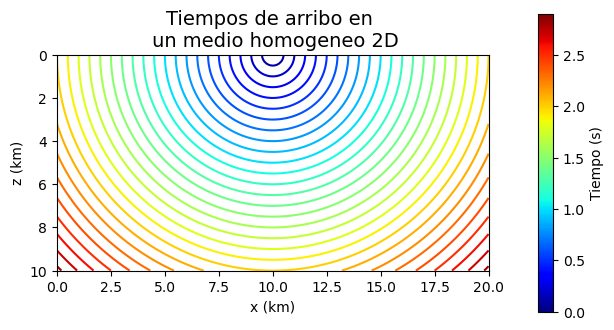

In [16]:
# Grafica con barra continua
fig=plt.figure(2)
ax =fig. add_subplot(111)
cs=ax.contour(X,Z,T,30, cmap='jet')
ax.set_title('Tiempos de arribo en \n un medio homogeneo 2D',fontsize=14)
ax.set_xlabel(r'x (km)', fontsize=10)
ax.set_ylabel(r'z (km)', fontsize=10)
ax.invert_yaxis()
ax.set_aspect('equal', adjustable='box')
norm= mpl.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
fig.colorbar(sm, fraction=0.03, pad=0.1, label='Tiempo (s)') #fig1.colorbar(cs, ax=bx, fraction=0.06, pad=0.001, label='Tiempo [s]') 
plt.savefig('GrafMedHom2DContColorBar.png')
plt.show()

# En 3D

In [9]:
# Origen
x0, y0, z0 =5, 5, 0
v=5                                             # Velocidad en km/s
de=0.1                                          # Espacio entre puntos
L_x, L_y, P_z = 10, 10, 10                      # Dimensiones del dominio horizontal y vertical
x=np.arange(0,L_x+de,de)                        # Dominio horizontal en x
y=np.arange(0,L_y+de,de)                        # Dominio horizontal en y
z=np.arange(0,P_z+de,de)                        # Dominio vertical
X, Y, Z = np.meshgrid(x, y, z)                  # Malla
T = np.sqrt((X-x0)**2+(Y-y0)**2+(Z-z0)**2)/v    # Tiempos de arribo a los puntos de la malla

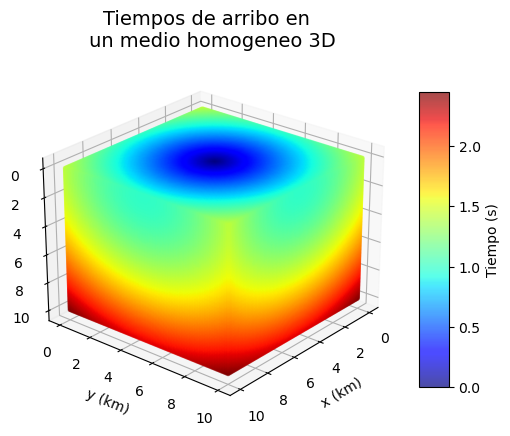

In [11]:
# Gráfica de todos los puntos con scatter
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.invert_zaxis()
ax.view_init(elev=25, azim=40) 
ax.set_title('Tiempos de arribo en \n un medio homogeneo 3D',fontsize=14)
cs=ax.scatter3D(X, Y, Z, c=T, alpha=0.7, marker='.', cmap='jet')
fig.colorbar(cs, shrink=0.8, aspect=10, label='Tiempo (s)') # ticks=cs.levels
plt.savefig('GrafMedHom3DContColorBar.png')
plt.show()

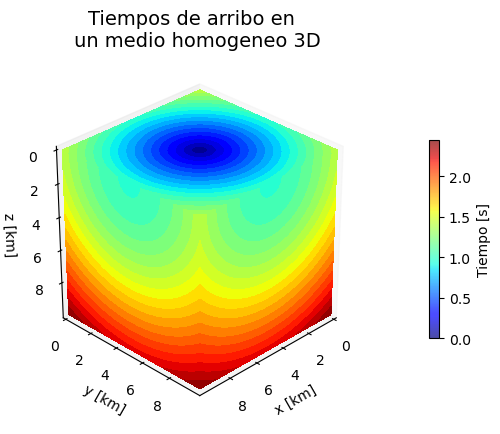

In [23]:
# Gráfica de todos los puntos con contourf

kw = {
    'vmin': 0,
    'vmax': T.max(),
    'levels': np.linspace(0, T.max(), 30),
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')

ax.set_xticks(list(range(0,L_x,int(L_x/5))))
ax.set_yticks(list(range(0,L_y,int(L_y/5))))
ax.set_zticks(list(range(0,P_z,int(P_z/5))))

ax.axes.set_xlim3d(left=0, right=L_x) 
ax.axes.set_ylim3d(bottom=0, top=L_y) 
ax.axes.set_zlim3d(bottom=0, top=P_z) 

ax.invert_zaxis()

ax.view_init(elev=30, azim=45) 
ax.set_box_aspect([L_x,L_y,P_z], zoom=0.9)
ax.set_title('Tiempos de arribo en \n un medio homogeneo 3D',fontsize=14)
ax.grid(visible=None)

_ = ax.contourf(X[:, :, 0], Y[:, :, 0], T[:, :, 0], zdir='z', offset=0, **kw, cmap='jet')
_ = ax.contourf(X[-1, :, :], T[-1, :, :], Z[-1, :, :], zdir='y', offset=Y.max(), **kw, cmap='jet')
C = ax.contourf(T[:, -1, :], Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw, cmap='jet')

fig.colorbar(cs, ax=ax, fraction=0.02, pad=0.1, label='Tiempo [s]') # ticks=cs.levels fig.colorbar(C, shrink=0.8, aspect=10, label='Tiempo (s)')
plt.savefig('GrafMedHom3DContColorBar_CF.png')
plt.show()

#norm= mpl.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
#sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
#sm.set_array([])
#fig.colorbar(sm, label='Tiempo (s)') 

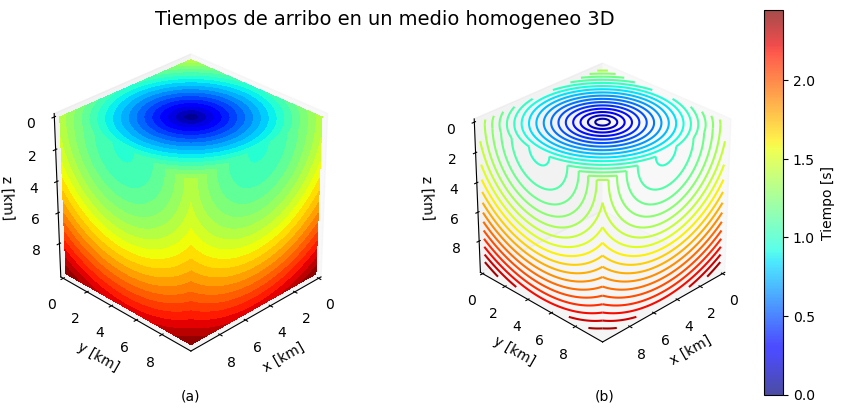

In [59]:
fig1=plt.figure(1, figsize=(10,5))

kw = {
    'vmin': 0,
    'vmax': T.max(),
    'levels': np.linspace(0, T.max(), 30),
}


ax = fig1.add_subplot(121, projection='3d')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')

ax.set_xticks(list(range(0,L_x,int(L_x/5))))
ax.set_yticks(list(range(0,L_y,int(L_y/5))))
ax.set_zticks(list(range(0,P_z,int(P_z/5))))

ax.axes.set_xlim3d(left=0, right=L_x) 
ax.axes.set_ylim3d(bottom=0, top=L_y) 
ax.axes.set_zlim3d(bottom=0, top=P_z) 

ax.invert_zaxis()

ax.view_init(elev=30, azim=45) 
ax.set_box_aspect([L_x,L_y,P_z], zoom=0.9)
ax.grid(visible=None)

_ = ax.contourf(X[:, :, 0], Y[:, :, 0], T[:, :, 0], zdir='z', offset=0, **kw, cmap='jet')
_ = ax.contourf(X[-1, :, :], T[-1, :, :], Z[-1, :, :], zdir='y', offset=Y.max(), **kw, cmap='jet')
C = ax.contourf(T[:, -1, :], Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw, cmap='jet')

bx = fig1.add_subplot(122, projection='3d')

bx.set_xlabel('x [km]')
bx.set_ylabel('y [km]')
bx.set_zlabel('z [km]')

bx.set_xticks(list(range(0,L_x,int(L_x/5))))
bx.set_yticks(list(range(0,L_y,int(L_y/5))))
bx.set_zticks(list(range(0,P_z,int(P_z/5))))

bx.axes.set_xlim3d(left=0, right=L_x) 
bx.axes.set_ylim3d(bottom=0, top=L_y) 
bx.axes.set_zlim3d(bottom=0, top=P_z) 

bx.invert_zaxis()
bx.view_init(elev=30, azim=45) 
bx.set_box_aspect([L_x,L_y,P_z], zoom=0.9)
bx.grid(visible=None)

_ = bx.contour(X[:, :, 0], Y[:, :, 0], T[:, :, 0], zdir='z', offset=0, **kw, cmap='jet')
_ = bx.contour(X[-1, :, :], T[-1, :, :], Z[-1, :, :], zdir='y', offset=Y.max(), **kw, cmap='jet')
Cc = bx.contour(T[:, -1, :], Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw, cmap='jet')


fig1.colorbar(cs, ax=bx, fraction=0.06, pad=0.001, label='Tiempo [s]') 

plt.figtext(0.306, 0.1, "(a)", ha="center", fontsize=10)
plt.figtext(0.72, 0.1, "(b)", ha="center", fontsize=10)
plt.figtext(0.5, 0.85, 'Tiempos de arribo en un medio homogeneo 3D', ha="center", fontsize=14)
#plt.title('Tiempos de arribo en un medio homogeneo 3D',fontsize=14)
plt.savefig('GrafMedHom3D.png')
plt.show()

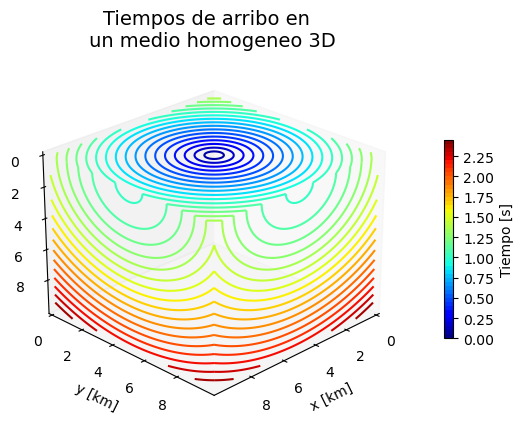

In [13]:
# Gráfica de los contornos con contour

kw = {
    'vmin': T.min(),
    'vmax': T.max(),
    'levels': np.linspace(T.min(), T.max(), 30),
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')

ax.set_xticks(list(range(0,L_x,int(L_x/5))))
ax.set_yticks(list(range(0,L_y,int(L_y/5))))
ax.set_zticks(list(range(0,P_z,int(P_z/5))))

ax.axes.set_xlim3d(left=0, right=L_x) 
ax.axes.set_ylim3d(bottom=0, top=L_y) 
ax.axes.set_zlim3d(bottom=0, top=P_z) 

ax.invert_zaxis()

ax.view_init(elev=25, azim=45) 
ax.set_title('Tiempos de arribo en \n un medio homogeneo 3D',fontsize=14)

_ = ax.contour(X[:, :, 0], Y[:, :, 0], T[:, :, 0], zdir='z', offset=0, **kw, cmap='jet')
_ = ax.contour(X[-1, :, :], T[-1, :, :], Z[-1, :, :], zdir='y', offset=Y.max(), **kw, cmap='jet')
Cc = ax.contour(T[:, -1, :], Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw, cmap='jet')

fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Tiempo [s]') 
ax.grid(visible=None)
plt.savefig('GrafMedHom3DContColorBar_C.png')
plt.show()